### Fitzhugh - Nagumo from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve

In [2]:
def dv_dt(v, w, In):
    """ Returns dv_dt = v(a-v)(v-1) - w + In """
    return (np.multiply(np.multiply(v,0.5-v), v-1) - w + In).reshape(-1,)
    
def dw_dt(v, w, b=0.1, r=0.1):
    return (b*v - r*w).reshape(-1,)

def fv_derivative(v):
    return (-3*v**2 + 3*v -0.5)

In [3]:
def vw_solver(In, v0, w0, b=0.1, r=0.1):
    """
    Solves for vt and wt with ODE Euler method
    This is a vectorized implementation, so it can take multiple initial v(0) and w(0) conditions and output vt and wt for each
    """
    t = np.arange(0, 80, 0.1)
    vt = np.zeros((v0.shape[0],len(t)))
    wt = np.zeros((w0.shape[0],len(t)))    
    
    vt[:,0] = v0.reshape(-1,)
    wt[:,0] = w0.reshape(-1,)
    
    for n in range(0,len(t)-1):
        vt[:,n+1] = vt[:,n] + dv_dt(vt[:,n], wt[:,n], In=In) *(t[n+1] - t[n])
        wt[:,n+1] = wt[:,n] + dw_dt(vt[:,n], wt[:,n],b,r) *(t[n+1] - t[n])
        
    return vt,wt


In [4]:
def vwt_plotter(vt, wt):
    """ Plots vt and wt as a function of time """
    
    t = np.arange(0, 80, 0.1)
    plt.figure(figsize=(15,5))
    plt.title("Graphs of v(t) and w(t)")
    
    plt.subplot(1,2,1)
    plt.plot(t.reshape(-1,), vt.reshape(-1,), 'b-')
    plt.title("v(t) vs t")
    plt.xlabel("time t")
    plt.ylabel("v(t)")
        
    plt.subplot(1,2,2)
    plt.plot(t.reshape(-1,), wt.reshape(-1,), 'r-')
    plt.title("w(t) vs t")
    plt.xlabel("time t")
    plt.ylabel("w(t)")
    

In [5]:
def phase_plotter(In = 0.6, b=0.1, r=0.1):
    """ PLots the entire phase portrait with v,w-nullclines included """
    
    v_range = np.arange(-2,2, 0.1)                     
    w_range = np.arange(-2,2, 0.1)
    v_mesh, w_mesh = np.meshgrid(v_range, w_range)     # Constructing a mesh of 2d points on v,w plane
    
    dv_mesh = np.zeros(v_mesh.shape)
    dw_mesh = np.zeros(w_mesh.shape)
    
    # Calculating dv_dt and dw_dt for every point in the mesh
    for i in range(dv_mesh.shape[0]):
        for j in range(dv_mesh.shape[1]):
            
            dv_mesh[i,j] = dv_dt(v_mesh[i,j], w_mesh[i,j], In)
            dw_mesh[i,j] = dw_dt(v_mesh[i,j], w_mesh[i,j], b, r)
    
    v_null = np.multiply(np.multiply(v_range,0.5-v_range), v_range-1) + In   #v_nullcline curve
    w_null = (b/r)*v_range     #w-nullcline curve
    
    plt.figure(figsize=(5,10))

      # I plotted a quiver plot, but it wasn't as informative as the next streamplot
#     plt.subplot(211)
#     plt.quiver(v_mesh, w_mesh, dv_mesh, dw_mesh, angles = 'xy', color='#cc00ff', scale=60)
#     plt.title("Quiver plot")
#     plt.xlabel("v")
#     plt.ylabel("w")
    
    plt.subplot(212)
    plt.ylim(top=1.5, bottom=-0.5)
    plt.streamplot(v_mesh, w_mesh, dv_mesh, dw_mesh, density=1.5, linewidth=None, color='r') 
    plt.plot(v_range, v_null, 'b-', label="v-nullcline")
    plt.plot(v_range, w_null, 'g-', label="w-nullcline")    
    plt.legend()
    plt.title("Stream plot with nullclines for In = " + str(In))
    plt.xlabel("v")
    plt.ylabel("w")


In [6]:
def vw_param_plot(v0, w0, In, b=0.1, r=0.1):
    """ Plots complete vt, wt trajectory for the given input v(0), w(0)
        This function is capable of outputting multiple trajectories for multiple input initial points
    """
    
    t = np.arange(0, 80, 0.1)
    vt, wt = vw_solver(In, v0, w0, b, r)
    
    v_range = np.linspace(np.min(vt) - 0.25, np.max(vt) + 0.25, len(t))
    w_range = np.linspace(np.min(wt) - 0.25, np.max(wt) + 0.25, len(t))
    
    v_null = np.multiply(np.multiply(v_range,0.5-v_range), v_range-1) + In
    w_null = (b/r)*v_range
       
    plt.figure(figsize=(5,5))
    
    for i in range(v0.shape[0]):
        plt.plot(vt[i,:],wt[i,:], 'r-')
    
    plt.plot(v_range, v_null, 'b-', label="v-nullcline")
    plt.plot(v_range, w_null, 'g-', label="w-nullcline")    
    
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.ylim(top=np.max(w0)+0.25, bottom=np.min(wt) - 0.25)
    plt.legend()
    if v0.size==1 and w0.size==1:
        plt.title("Parametric vw plot for v0 = " + str(v0) + " w0 = " + str(w0)) 
    else:
        plt.title("Parametric vw plot")
    plt.xlabel("v")
    plt.ylabel("w")


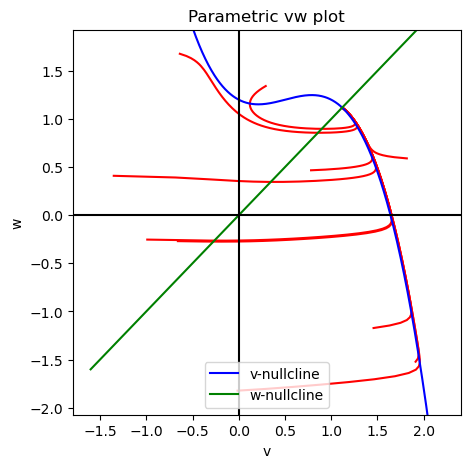

In [7]:
# Sample plot for multiple v0, w0
v0 = np.random.uniform(low=-2, high=2, size=(10,))
w0 = np.random.uniform(low=-2, high=2, size=(10,))

vw_param_plot(v0, w0, In=1.2)

In [8]:
def find_fixed_points(In = 0.6, b=0.1, r=0.1):
    """ Calculates and returns fixed points (intersection points of nullclines) """
    In = In
    
    def equations(vars):
        v, w = vars
        eq1 = v*(0.5-v)*(v-1) - w + In
        eq2 = b*v - r*w
        return [eq1, eq2]

    v_root, w_root =  fsolve(equations, (1, 1))
    return v_root, w_root


In [9]:
def fp_analysis(v_root, w_root, b=0.1, r=0.1):
    """ Evaluates the stability of fixed points via the trace and determinant of their jacobian """
    
    #calculate trace and determinant of jacobian of fixed point
    trace = fv_derivative(v_root) - r
    deter = -r*fv_derivative(v_root) + b
    
    if deter>0 and trace<0:
        print("The fixed point " + str([v_root,w_root]) + " is stable with deter " + str(deter) + " and trace " + str(trace))
    elif deter>0 and trace>0:
        print("The fixed point " + str([v_root,w_root]) + " is unstable with deter " + str(deter) + " and trace " + str(trace))
    elif deter<0:
        print("The fixed point " + str([v_root,w_root]) + " is a saddle point")
        
    return trace, deter        

For In = 0: 
The fixed point [-1e-323, 5e-324] is stable with deter 0.15000000000000002 and trace -0.6


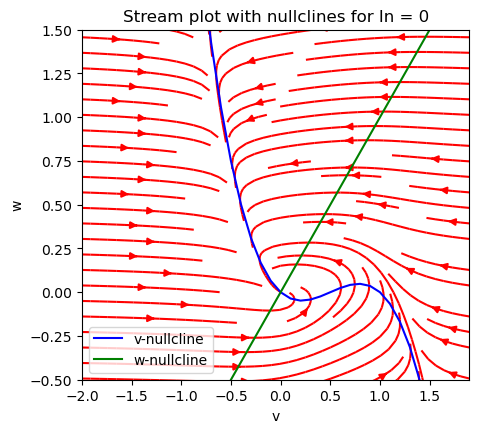

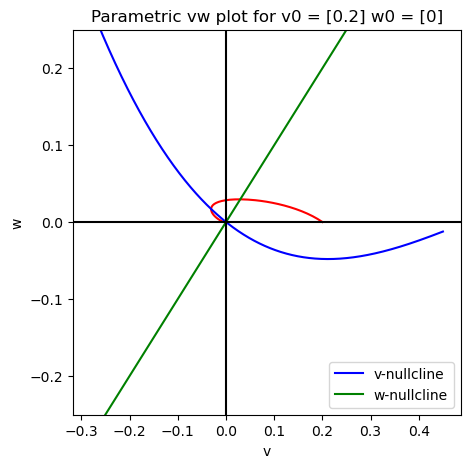

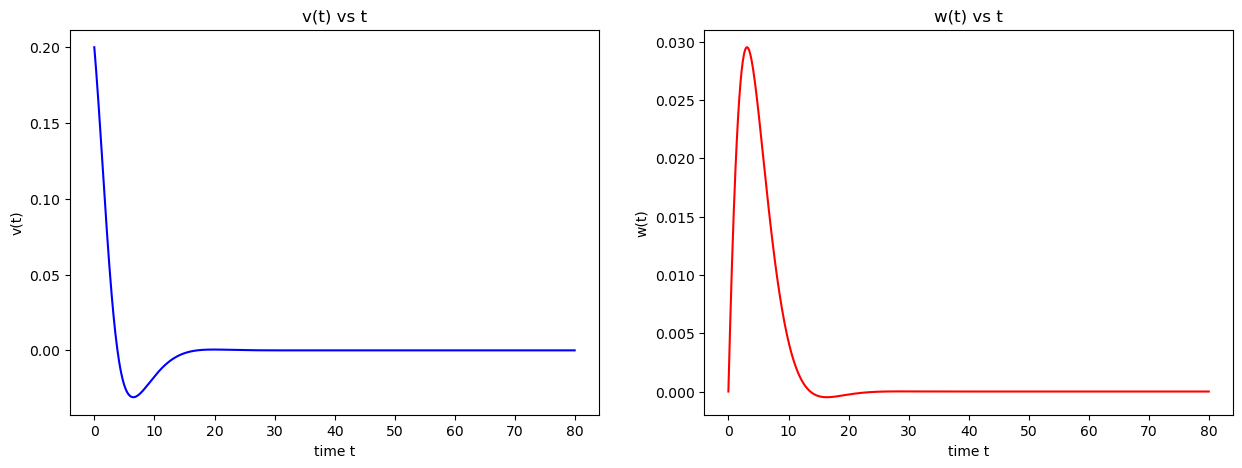

In [10]:
# put it all together for 4 cases

#CASE 1

#finding fixed points
print("For In = 0: ")
vr, wr = find_fixed_points(In = 0)
tr, det = fp_analysis(vr, wr)

phase_plotter(In=0)

# Initial v0=0.2<a and w0=0
vw_param_plot(v0=np.array([0.2]), w0=np.array([0]), In=0)
vt, wt = vw_solver(v0=np.array([0.2]), w0=np.array([0]), In=0)
vwt_plotter(vt=vt, wt=wt)


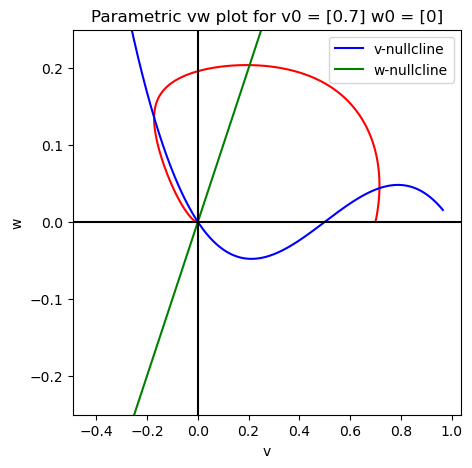

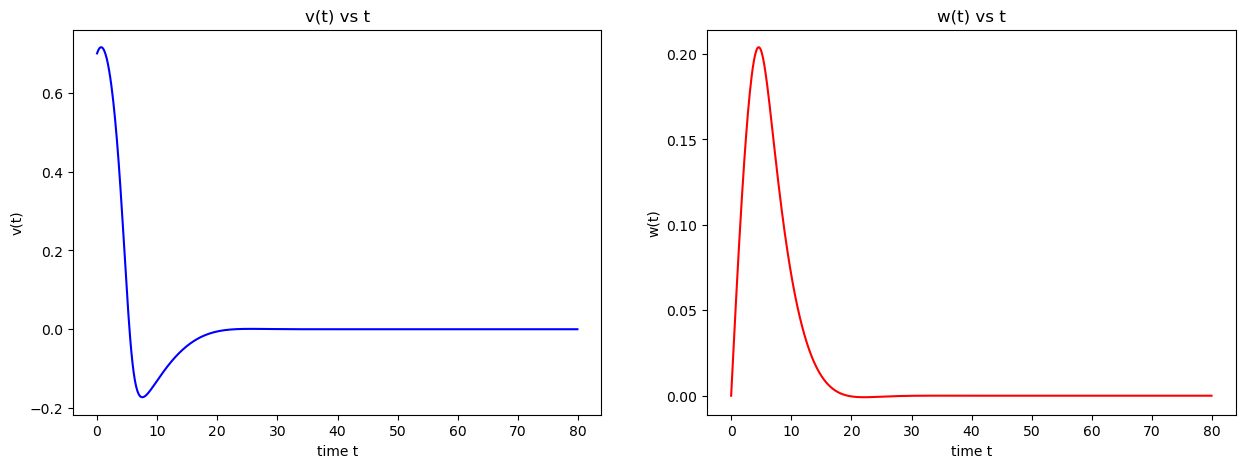

In [11]:
#CASE1
# Initial v0=0.7>a and w0=0
vw_param_plot(v0=np.array([0.7]), w0=np.array([0]), In=0)
vt, wt = vw_solver(v0=np.array([0.7]), w0=np.array([0]), In=0)
vwt_plotter(vt=vt, wt=wt)

First current threshold for limit cycle occurences is  0.276393202250021
Second current threshold for limit cycle decline is  0.723606797749979

For In = 0.6 : 
The fixed point [0.630378349092177, 0.630378349092177] is unstable with deter 0.08009955417360047 and trace 0.09900445826399537


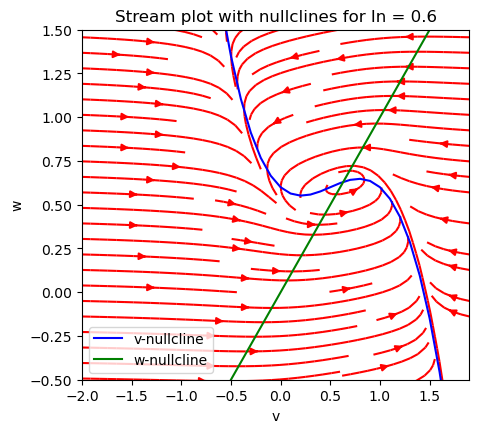

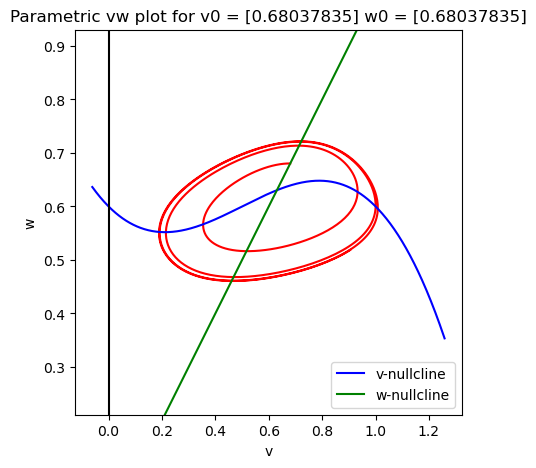

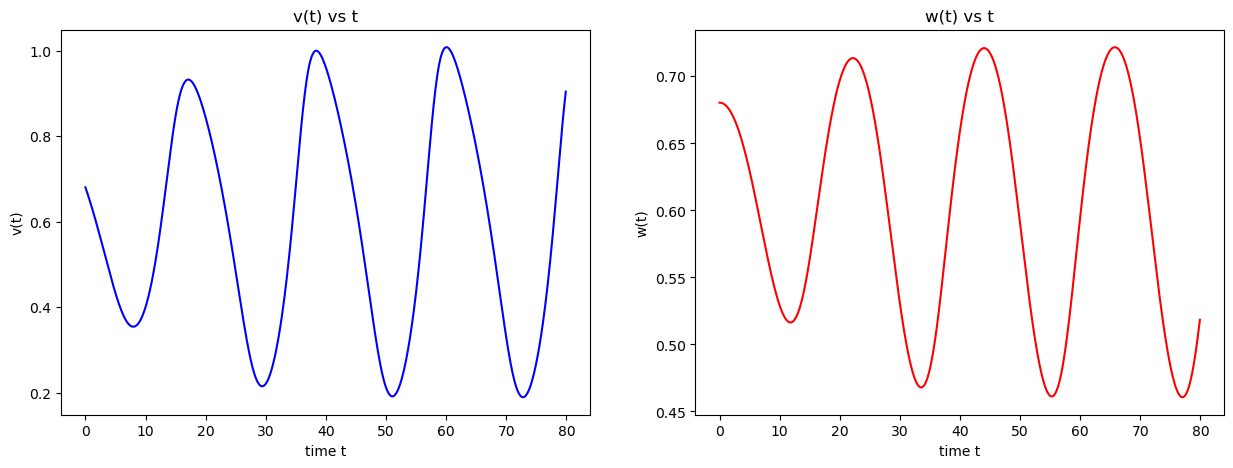

In [12]:
#CASE2

#Finding the i1,i2 thresholds of oscillatory behavior
def find_i1_i2():
    
    #  since Tr = f'(v)- 0.1, trace = 0 is the crossing over point from stable to unstable fixed point
    # solving for roots of (-3*v**2 + 3*v -0.5) - 0.1 = 0:
    coeff = [-3, 3, -0.6]
    [i2, i1] = np.roots(coeff)
    print("First current threshold for limit cycle occurences is ", i1)
    print("Second current threshold for limit cycle decline is ", i2)

find_i1_i2()

#Choosing In = 0.6 from [i1,i2] range:
#finding fixed points
print("\nFor In = 0.6 : ")
vr, wr = find_fixed_points(In = 0.6)
tr, det = fp_analysis(vr, wr)

phase_plotter(In=0.6)

# For a small perturbation of 0.05 away from fixed point vr,wr : 
vw_param_plot(v0=np.array([vr+0.05]), w0=np.array([wr+0.05]), In=0.6)
vt, wt = vw_solver(v0=np.array([vr+0.05]), w0=np.array([wr+0.05]), In=0.6)
vwt_plotter(vt=vt, wt=wt)


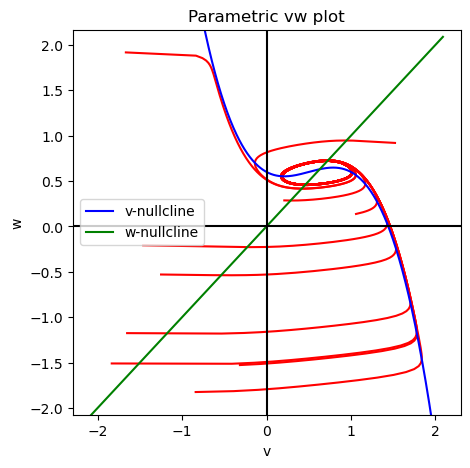

In [13]:
#CASE2

# Random initial points and their trajectories show us that all curves converge to the limit cycle finally
v0 = np.random.uniform(low=-2, high=2, size=(10,))
w0 = np.random.uniform(low=-2, high=2, size=(10,))

vw_param_plot(v0, w0, In=0.6)


For In = 1.2 : 
The fixed point [1.1182483703817818, 1.1182483703817818] is stable with deter 0.18966931424391864 and trace -0.9966931424391862


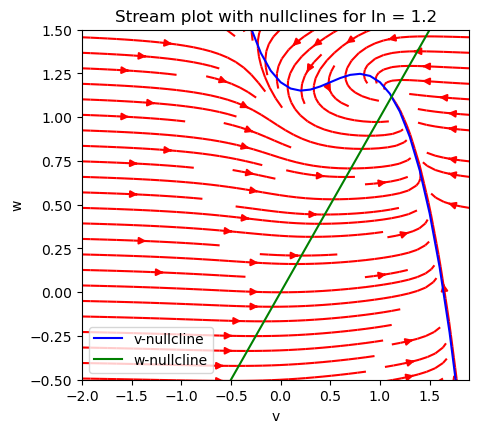

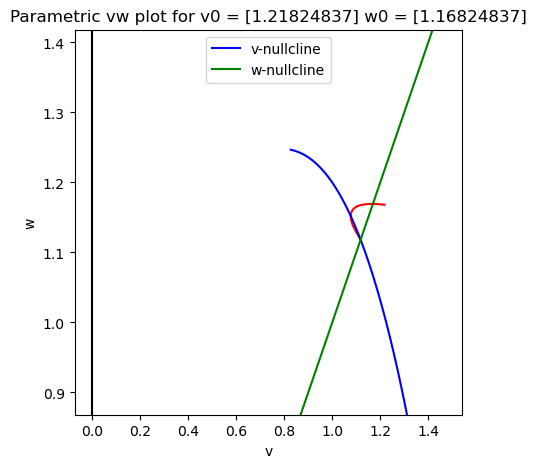

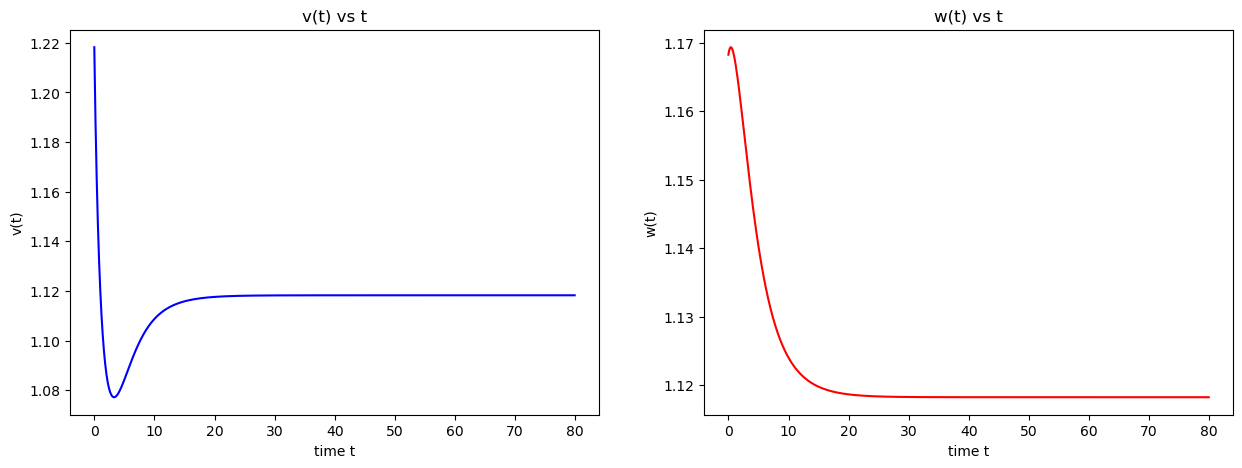

In [14]:
#CASE3

#Choosing In = 1.2 beyond i2 :
#finding fixed points
print("\nFor In = 1.2 : ")
vr, wr = find_fixed_points(In = 1.2)
tr, det = fp_analysis(vr, wr)

phase_plotter(In=1.2)

# For a small perturbation of 0.05 away from fixed point vr,wr : 
vw_param_plot(v0=np.array([vr+0.1]), w0=np.array([wr+0.05]), In=1.2)
vt, wt = vw_solver(v0=np.array([vr+0.1]), w0=np.array([wr+0.05]), In=1.2)
vwt_plotter(vt=vt, wt=wt)

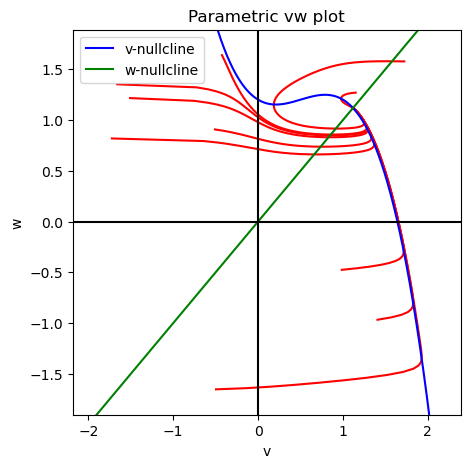

In [15]:
#CASE3

# Random initial points and their trajectories show us that all curves spiral into the stable fixed point finally
v0 = np.random.uniform(low=-2, high=2, size=(10,))
w0 = np.random.uniform(low=-2, high=2, size=(10,))

vw_param_plot(v0, w0, In=1.2)

In [ ]:
#CASE4

#To get three fixed points, we choose In = 0.03, b = 0.1, r = 2
def find_fixed_points_three(In = 0.03, b = 0.1, r = 2):
    """ Calculates and returns fixed points (intersection points of nullclines) """
    In = In
    
    def equations(vars):
        v, w = vars
        eq1 = v*(0.5-v)*(v-1) - w + In
        eq2 = b*v - r*w
        return [eq1, eq2]
    
    roots = np.zeros((1,2))
    for v_neigh in np.arange(0,1,0.01):
        for w_neigh in np.arange(-0.1,0.1,0.01):
            vr, wr =  fsolve(equations, (v_neigh, w_neigh))
            roots = np.concatenate((roots, np.array([vr,wr]).reshape(1,2)), axis=0)
    
    roots = np.unique(np.round(roots[1:,:], 3), axis=0)
    return np.delete(np.unique(np.round(roots[1:,:], 3), axis=0), (1,3), axis=0)

r = find_fixed_points_three(In = 0.03, b = 0.1, r = 2)

# Testing stability of the three fixed points
for i in range(3):    
    fp = r[i,:]
    t,w = fp_analysis(fp[0], fp[1])


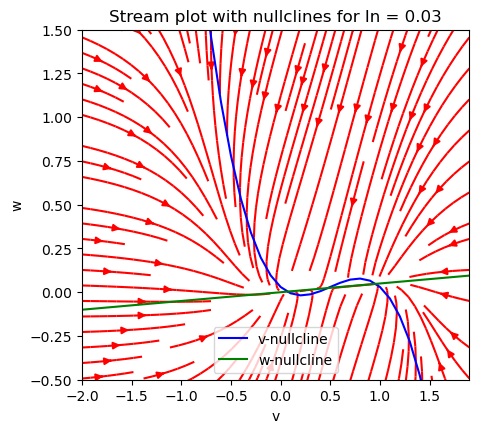

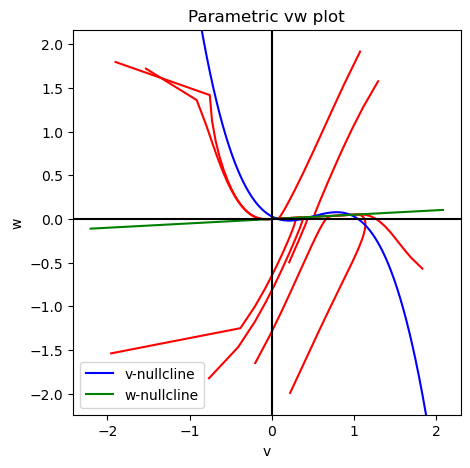

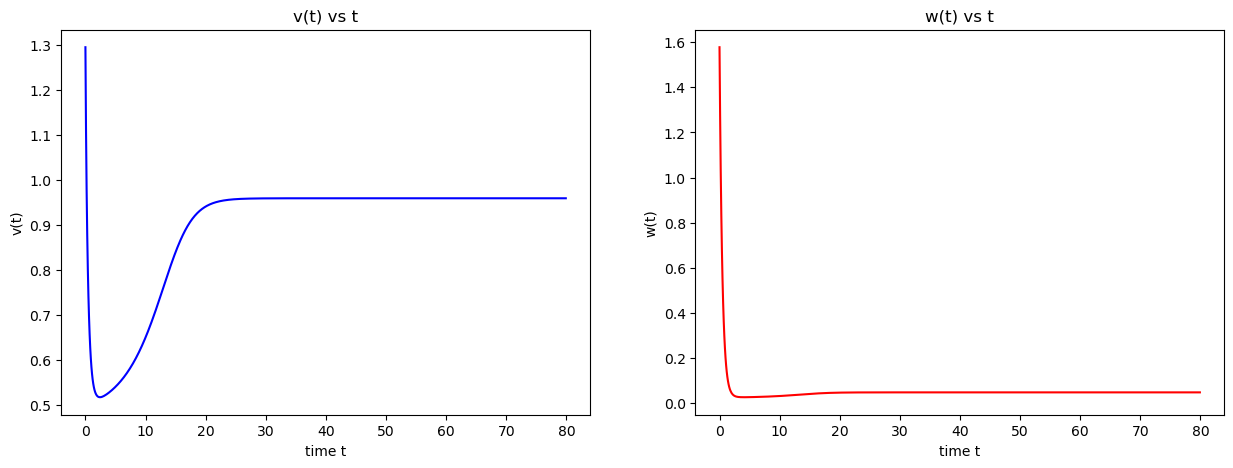

In [22]:
#CASE4
phase_plotter(In = 0.03, b = 0.1, r = 2)

# Random initial points and their trajectories show us general trend
v0 = np.random.uniform(low=-2, high=2, size=(10,))
w0 = np.random.uniform(low=-2, high=2, size=(10,))

vw_param_plot(v0, w0, In = 0.03, b = 0.1, r = 2)

# vt and wt are shown for one of the random initial points and 
# it is seen that they converge to the third fixed point P3 - [0.959, 0.048]
vt, wt = vw_solver(v0=v0[0].reshape(-1,), w0=w0[0].reshape(-1,), In = 0.03, b = 0.1, r = 2)
vwt_plotter(vt=vt, wt=wt)